In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('IMDB-Dataset.csv')

In [3]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
data.dropna(inplace=True)

In [6]:
def clean_rev(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [7]:
data['review'] = data['review'].apply(clean_rev)

KeyboardInterrupt: 

In [9]:
from wordcloud import WordCloud

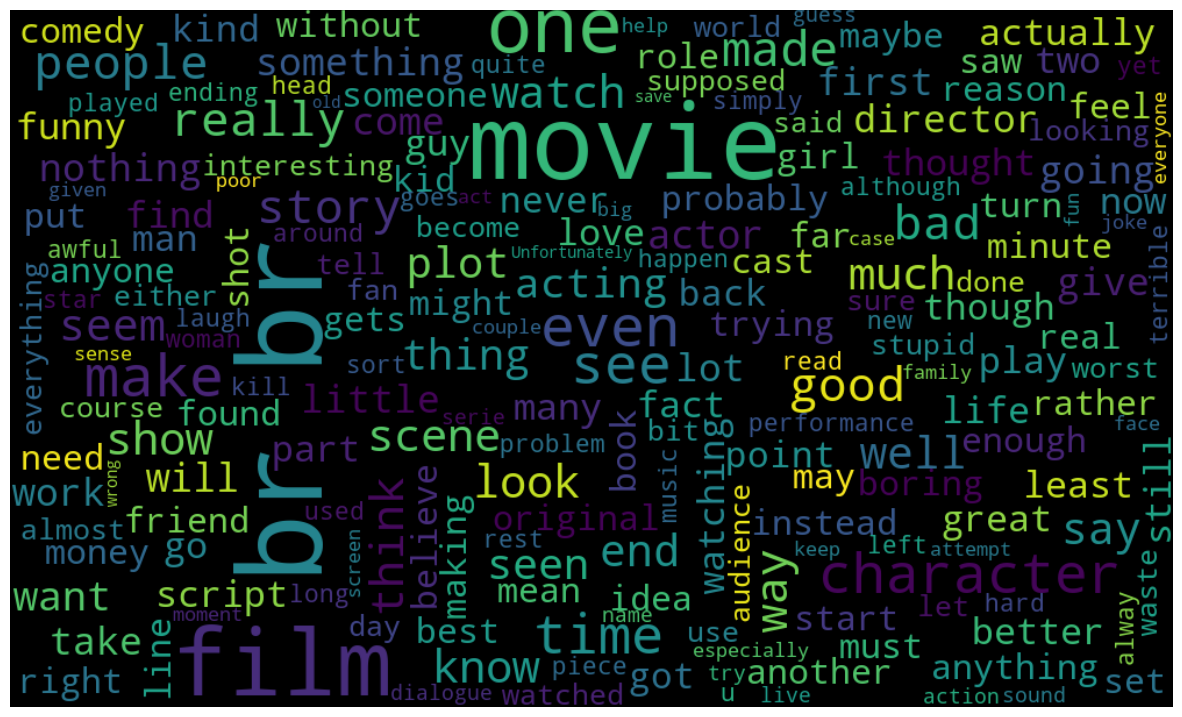

In [10]:
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(height = 600,width = 1000 , max_font_size = 100)
plt.figure(figsize = (15,12))
plt.axis('off')
plt.imshow(wordcloud.generate(reviews), interpolation = 'bilinear')
plt.show()

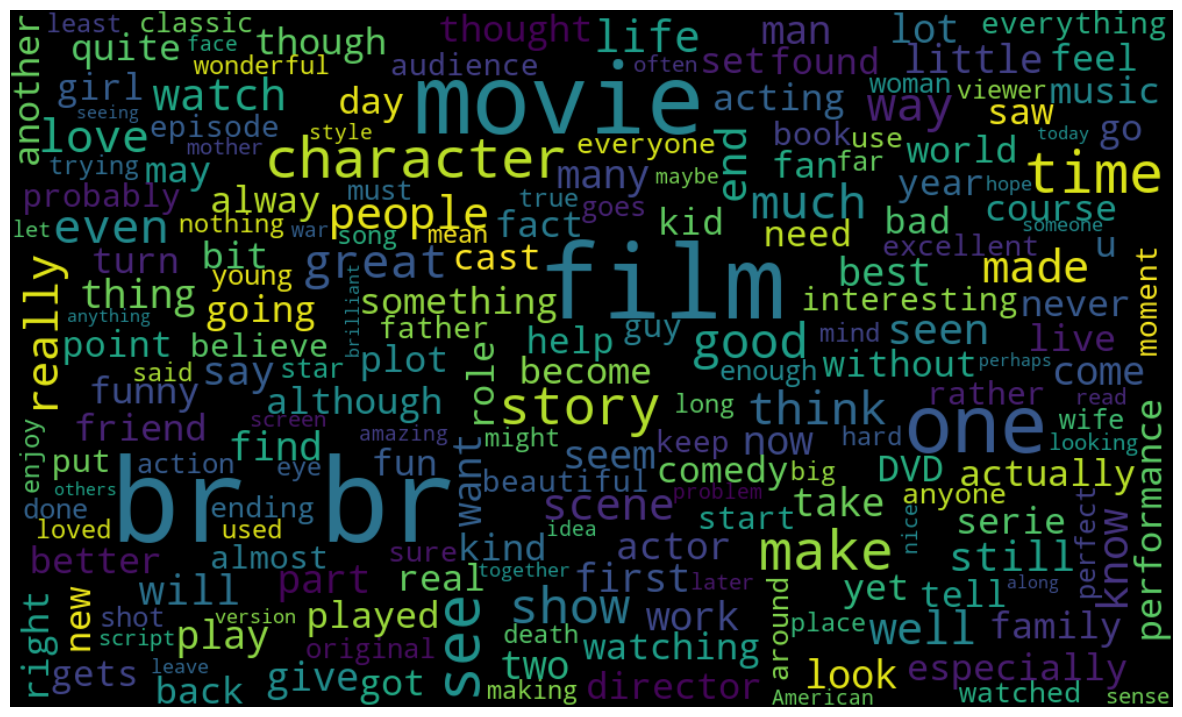

In [11]:
reviews = ' '.join(word for word in data['review'][data['sentiment']=='positive'].astype(str))
wordcloud = WordCloud(height = 600 , width = 1000 , max_font_size = 100)
plt.figure(figsize = (15,12))
plt.axis('off')
plt.imshow(wordcloud.generate(reviews), interpolation = 'bilinear')
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [14]:
reviews = cv.fit_transform(data['review']).toarray()

In [15]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])

C:\Users\Jeet Patel\AppData\Local\Temp\ipykernel_14108\3911524901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])


In [16]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews , data['sentiment'], test_size=0.2)

In [21]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [22]:
predict = model.predict(reviews_test)

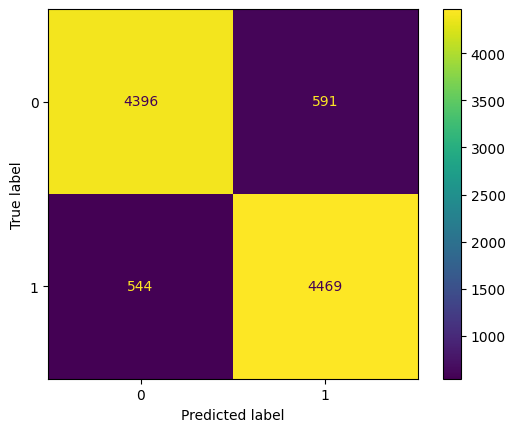

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict ,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [24]:
import pickle as pk

In [25]:
pk.dump(model,open('model.pkl','wb'))

In [26]:
pk.dump(cv,open('scaler.pkl','wb'))